# Part II - Diffferent Features Relationships 
## by (Ajanaku Olumide)


## Investigation Overview


> My investigation was majorly centered around viewing features which had strong relationships, that way we could see how the contributed to the completed status in the LoanStatus feature.


## Dataset Overview

> The dataset consisted of both Quantitative and Qualitative variables which amounted to 113,937 entries. A little bit of cleaning and tidying was carried out on the data, also I had to select some columns i'd be using for my investigation, not all the columns were relevant for my investigation.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('prosperLoanData.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.


## Monthly Loan Payment Borrower Rate

> The scatterplot and heatmap shows the Borrowers Rate according to their monthly loan payment. For the scatterplot the distribution is not really clear as we have a very large number of points even as we specified the transparency. 

>However, from the heatmap we can gain more insights from the same plot by noticing how some points change color from yellow to green, which means those points have more frequency. Consequently, we can easily conclude what Borrower Rate an applicant will be getting from their Monthly Loan payment.


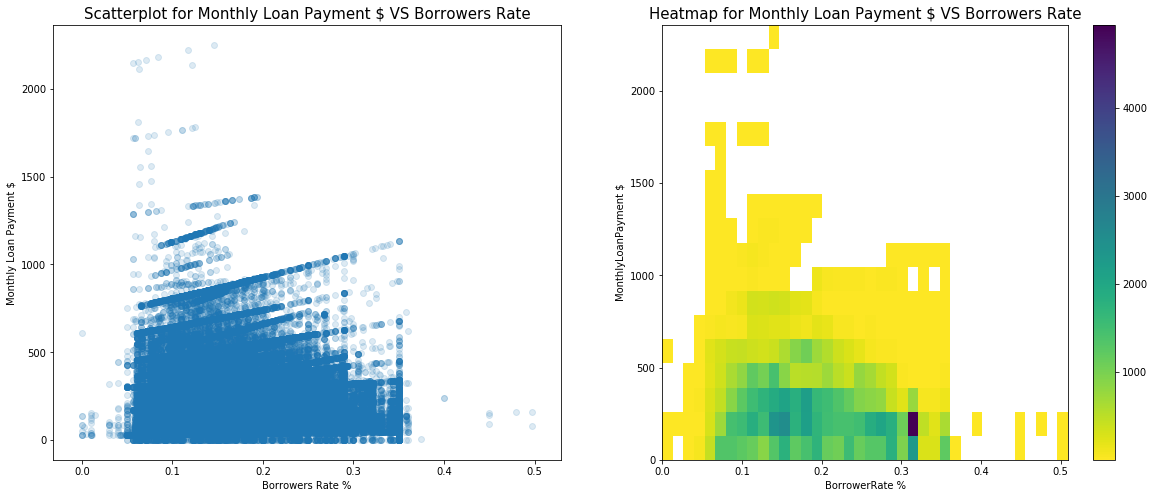

In [3]:
plt.figure(figsize=[20, 8])

plt.subplot(1,2,1)
plt.scatter(data = df_loan, x = 'BorrowerRate', y = 'MonthlyLoanPayment', alpha = 3/20)
plt.xlabel('Borrowers Rate %')
plt.ylabel('Monthly Loan Payment $')
plt.title('Scatterplot for Monthly Loan Payment $ VS Borrowers Rate', {'fontsize':15})

plt.subplot(1,2,2)
bins_x = np.arange(0, df_loan['BorrowerRate'].max()+0.0134, 0.0134)
bins_y = np.arange(0, df_loan['MonthlyLoanPayment'].max()+131, 131)
plt.hist2d(data = df_loan, x = 'BorrowerRate', y = 'MonthlyLoanPayment', cmin=0.5, cmap = 'viridis_r',
          bins = [bins_x, bins_y])
plt.colorbar()
plt.title('Heatmap for Monthly Loan Payment $ VS Borrowers Rate', {'fontsize':15})
plt.xlabel('BorrowerRate %')
plt.ylabel('MonthlyLoanPayment $')
plt.show();

## Numeric Features Correlation

> The Next plot we have is a pairplot showing the correlation between the numeric features in my dataset. We can see a number of interesting features that have a strong positive correlations and some that doesn't.

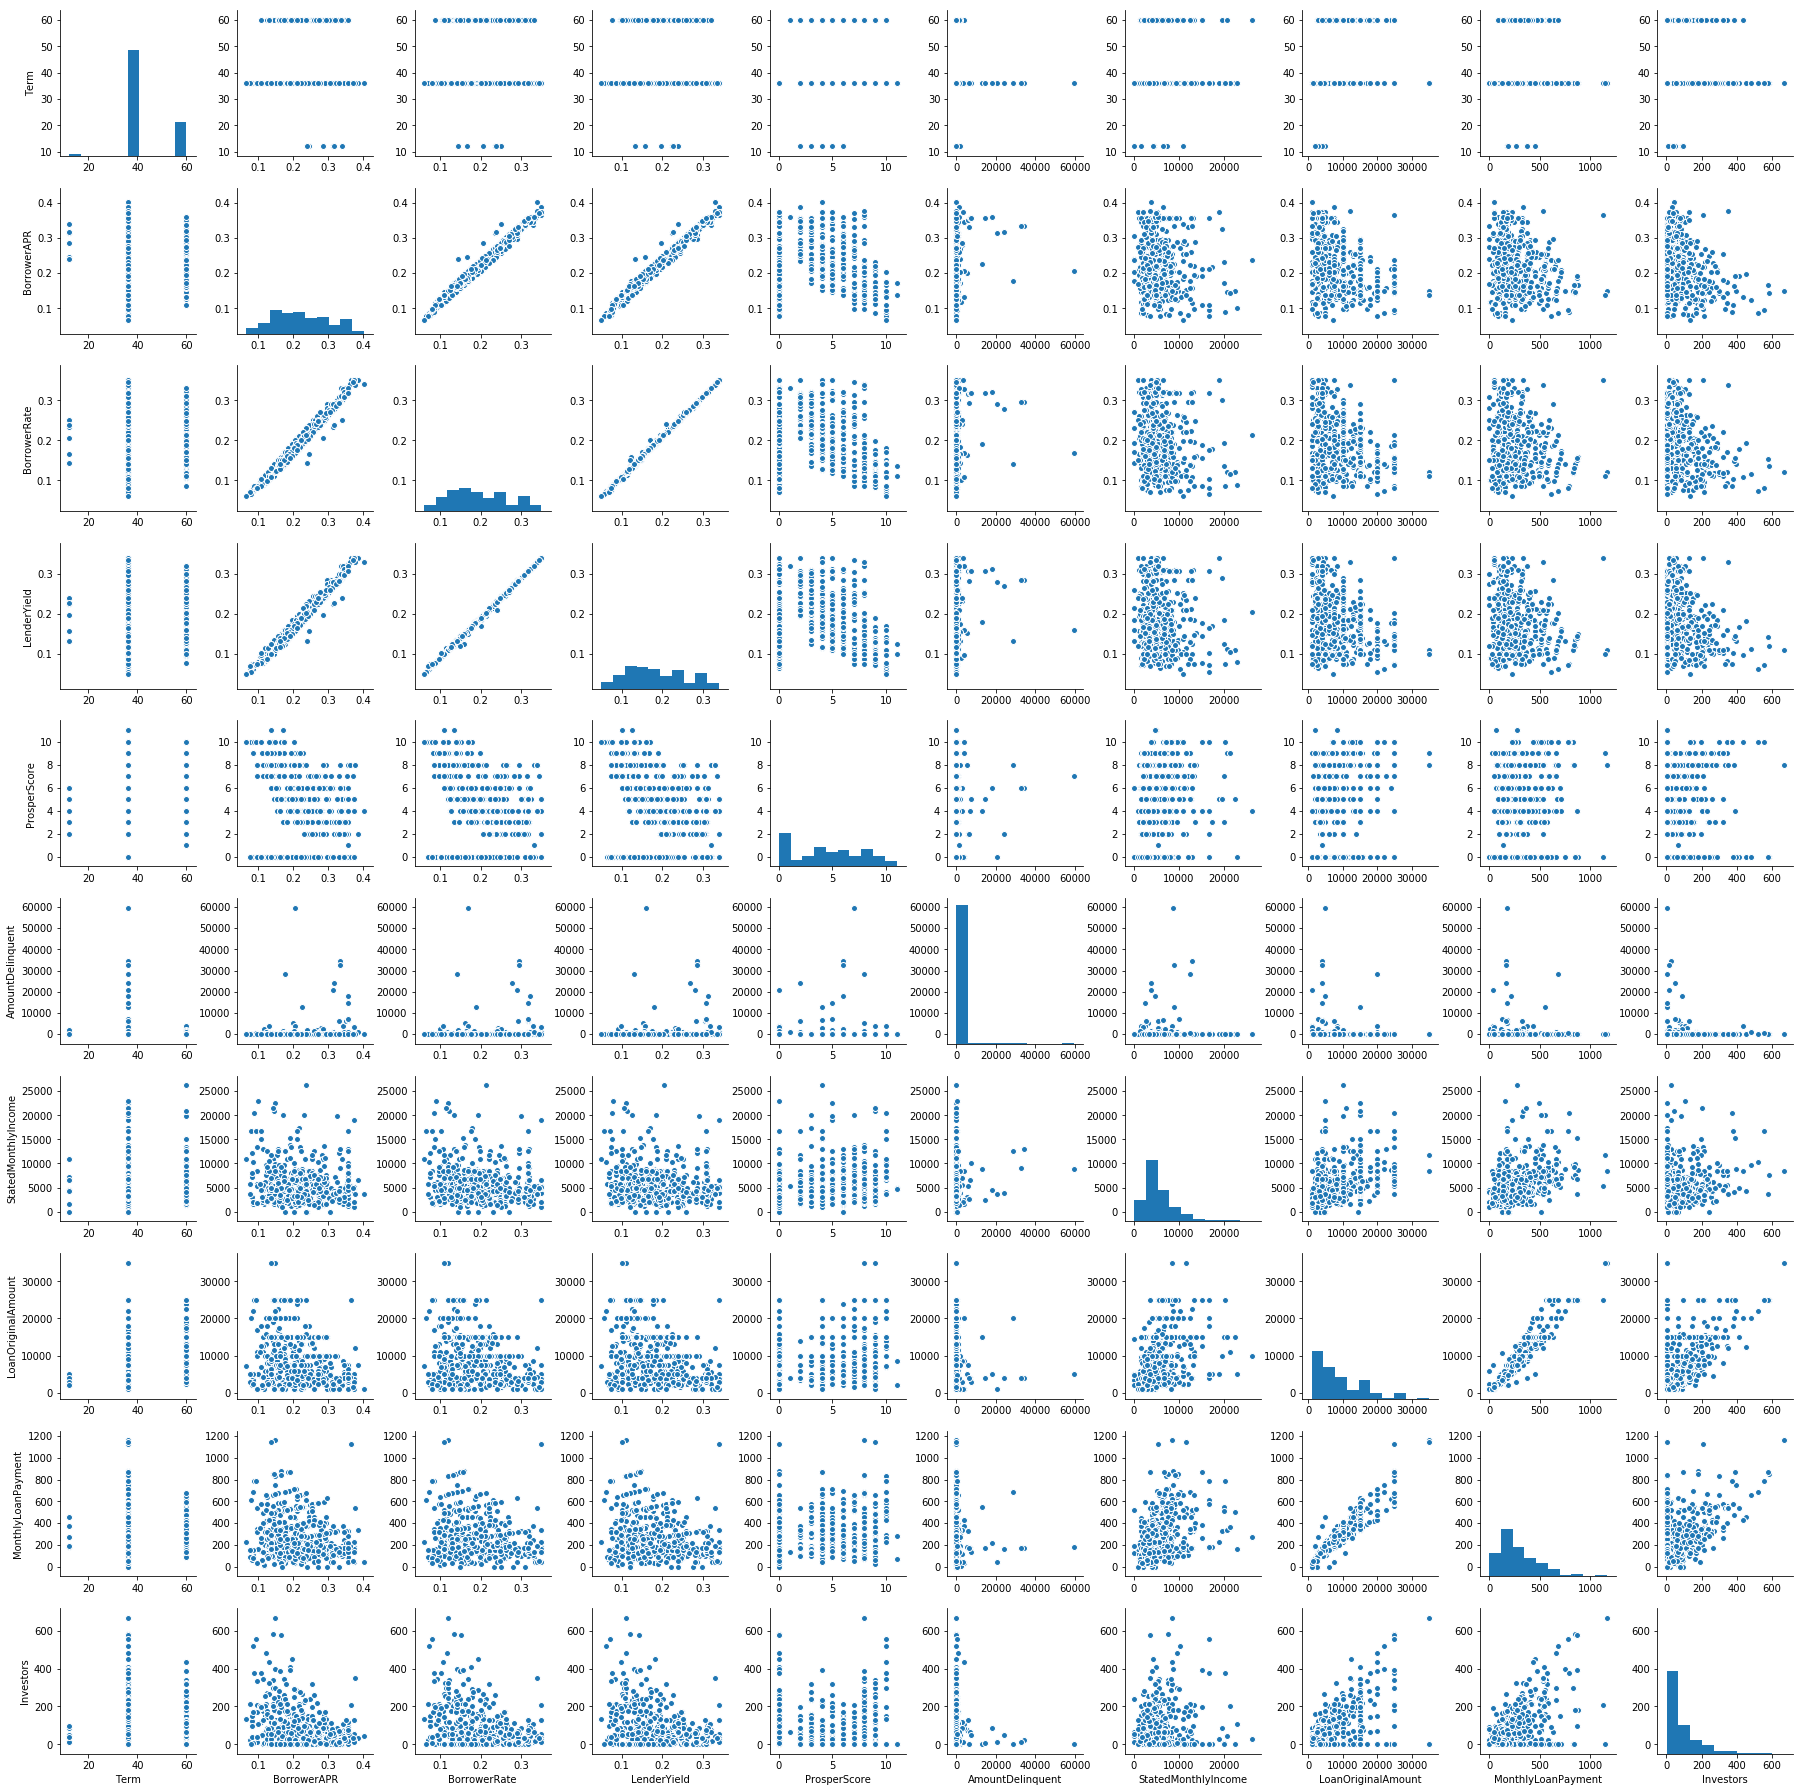

In [4]:
numeric_values = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperScore', 'AmountDelinquent',
                           'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors']

df_loan['ProsperScore'].fillna(0, inplace=True)
df_loan['AmountDelinquent'].fillna(0, inplace=True)


samples = np.random.choice(df_loan.shape[0], 500, replace = False)
df_loan_sample = df_loan.loc[samples,:]

sb.pairplot(data = df_loan_sample, vars = numeric_values);

## Loan Original Amount Distribution

> We can deduce from this plot that most of the high Loan Orignal Amount was from people with a high prosper score. In addition, the people with the high prosper had the lowest BorrowerAPR, whereas the people whose prosper score fell within the range of 1 - 4 had a higher BorrowerAPR.

> Also, we can see the desinty of the Loan Orignal Amount lies around 5000 as we have a lot of points with the shade of 5000 on the colorbar in our scatterplot


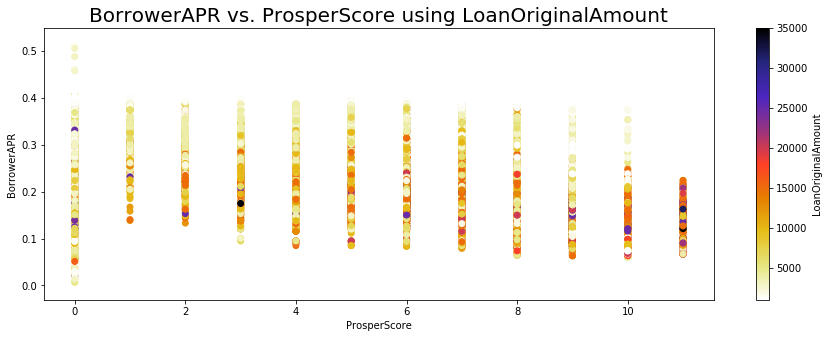

In [5]:
plt.figure(figsize = [15, 5]) 
cm = plt.cm.get_cmap('CMRmap_r')
plt.scatter(data=df_loan[df_loan['StatedMonthlyIncome']<20000],x='ProsperScore',y='BorrowerAPR',c='LoanOriginalAmount',cmap=cm) 
plt.colorbar(label = 'LoanOriginalAmount')
plt.title('BorrowerAPR vs. ProsperScore using LoanOriginalAmount', {'fontsize':20})
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 283362 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
